[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.2 CO2-Emissionen

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [45]:
data = elmap.preprocess()
data.info()

FLUCCOplus.notebooks loaded!
read_raw took 0:00:00.864236
start_pipeline took 0:00:00.009974 for (17505, 83) df
fetch_1819 took 0:00:00.901138
read_raw took 0:00:01.770888
start_pipeline took 0:00:00.003990 for (26304, 18) df
start_pipeline took 0:00:00.003990 for (26304, 18) df
clean151617 took 0:00:00.021942 for (26304, 16) df
preprocess took 0:00:02.800680
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43809 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon_intensity_avg                     43663 non-null  float64
 1   power_consumption_battery_discharge_avg  26304 non-null  float64
 2   power_consumption_biomass_avg            43663 non-null  float64
 3   power_consumption_coal_avg               43663 non-null  float64
 4   power_consumption_gas_avg                43663 non-null  

[autoreload of FLUCCOplus.electricitymap failed: Traceback (most recent call last):
  File "C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\IPython\extensions\autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: clean151617() requires a code object with 0 free vars, not 1
]


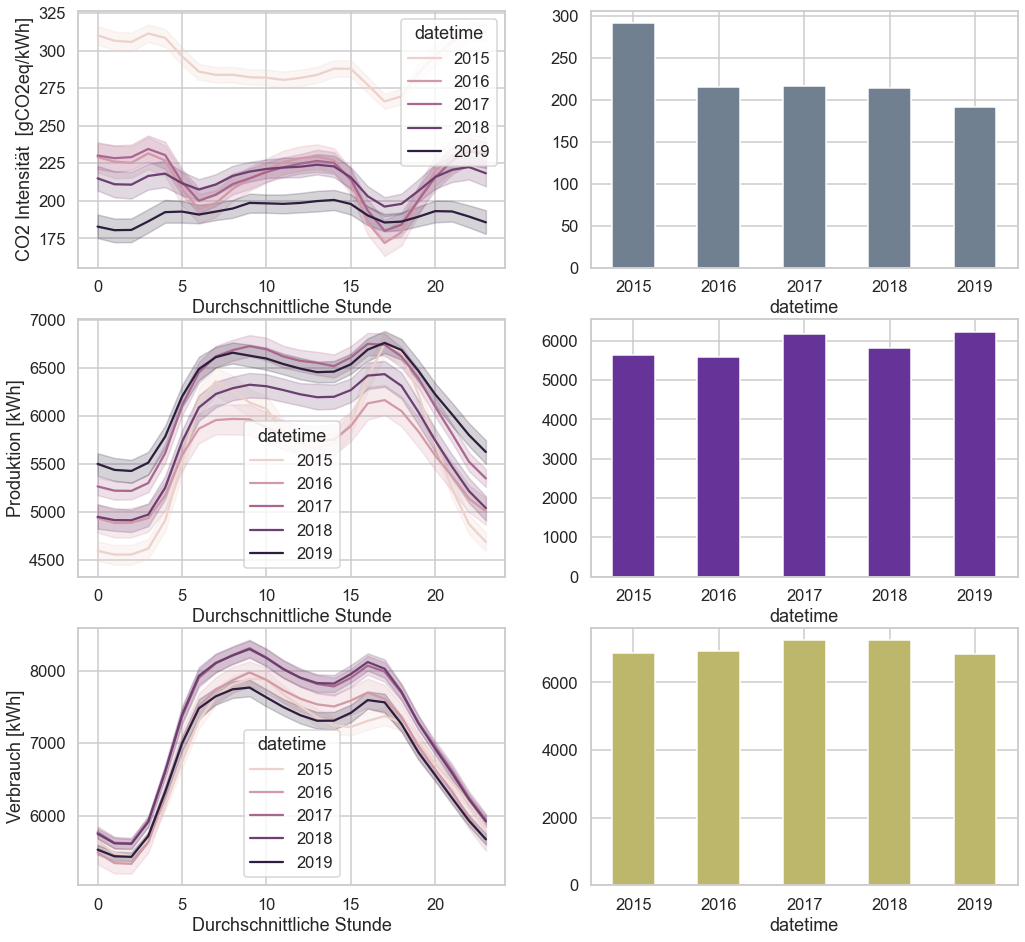

In [9]:


numerical = ["carbon_intensity_avg",
          "total_production_avg",
          "total_consumption_avg"]
titles = ["CO2 Intensität  [gCO2eq/kWh]", "Produktion [kWh]", "Verbrauch [kWh]"]
colors = ["slategrey", "rebeccapurple", "darkkhaki"]
data = data[numerical]


sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")

fig, ax = plt.subplots(3,2, figsize=(15,15))
for col, var in enumerate(numerical):
    sns.lineplot(x=data.index.hour, y=var, data=data, hue=data.index.year, ax=ax[col][0]);
    data.groupby(data.index.year)[var].mean().plot(kind="bar", rot=0, color=colors[col], ax=ax[col][1])
    ax[col][0].set(xlabel="Durchschnittliche Stunde",ylabel=titles[col])


average took 0:00:15.762442


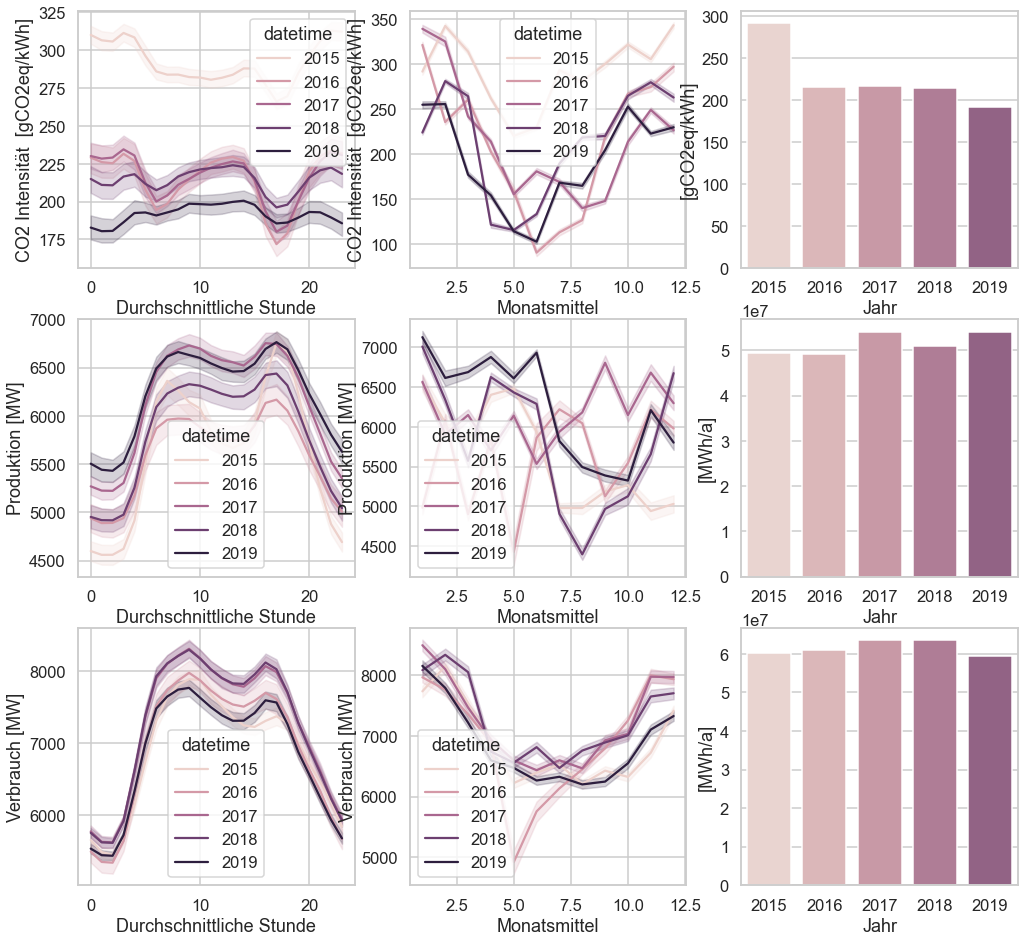

In [44]:
import FLUCCOplus.plots as fp


variables = [
        fp.Variable(name="carbon_intensity_avg",
                 ylabel="CO2 Intensität  [gCO2eq/kWh]",
                 agg="mean",ylabel_agg="[gCO2eq/kWh]"),
        fp.Variable(name="total_production_avg",
                 ylabel="Produktion [MW]",
                 agg="sum", ylabel_agg="[MWh/a]"),
        fp.Variable(name="total_consumption_avg",
                 ylabel="Verbrauch [MW]",
                 agg="sum", ylabel_agg="[MWh/a]")
]

sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")
fp.average(data, variables)

average took 0:01:18.041350


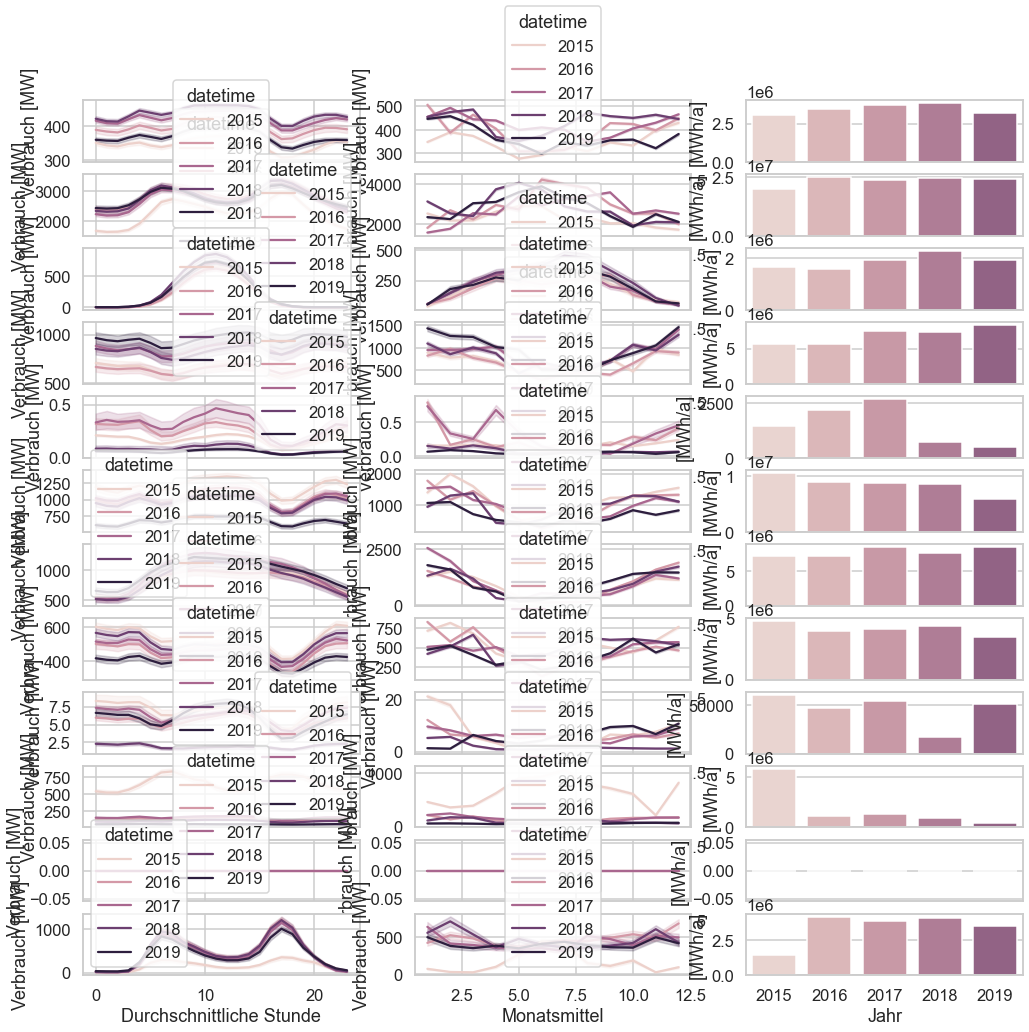

In [43]:
variables = [
    fp.Variable(name=elmap.col("power_consumption",source),
                 ylabel="Verbrauch [MW]",
                 agg="sum", ylabel_agg="[MWh/a]")
    for source in elmap.sources]


fp.average_sources(data, variables)

In [8]:
data.agg("mean")


carbon_intensity_avg      225.919750
total_production_avg     5893.952622
total_consumption_avg    7029.329051
dtype: float64